# Jupyter Notebooks

In the recent past engineers learned complex mathematical procedures to find solutions (or good appriximations) to solve the varied equations involved in engineering calculations. Then these procedures were coded into a computer programming language (C, FORTRAN, ADA, and others), compiled, errors repaired and finally the actual problem addressed.  More recently spreadsheets (MS Excel, Borland (now Embarcadero) QuatroPro, Lotus 123, Libre Office Calc, and others) replaced a lot of this type of programming.  Even more recently Jupyter Notebooks enabled a technique called *Literate Programming* where narrative docomentation can be embedded within an executible document, and both the explaination and solution exist in a single tool.  

Lengthly calculations are comparatively easy to arrange and organize, and output can be extensively explained directly in the tool in a clear and logical fashion.

:::{note}
This electronic book is just a collection of Jupyter Notebooks typeset using a program called Sphinx.  
:::

Jupyter Notebooks using the iPython kernel also have extensible features that allow:

- Importing, exporting, storing (in a file) data (using core python, and/or pandas)
- Graphical display of data (using matplotlib)
- Statistical analysis of data (using numpy, pandas, statmodel, sklearn, and other packages)
- Fitting algebraic data models through data sets (using core python, numpy, pandas, statmodel, sklearn, and other packages)
- Solving single and simultaneous algebraic equations
- Solving optimization problems
- Solving classification-type machine learning problems
- Solving prediction-type machine learning problems

## Projectile Trajectory Analysis Example

This example presents a Jupyter Notebook that solves a common geopolitical problem, namely that of turning a capital city onto a smoking crater by a ballistic missle whose immediate post-boost phase velocity $v_o$ and angle relative to the Earth (treated as a plane) $\Theta$ is known.

:::{note}
The example is primarily to illustrate the Jupyter environment, and many parts of the notebook are explained later in the course. A problem solving protocol is explained later as well, so in this first example the reader will have to be mentally flexible.
:::

### Step 1: Problem Statement

Determine the trajectory of a missle whose immediate post-boost phase velocity $V_o$ and angle relative to the Earth (treated as a plane) $\Theta$ is known.  Produce a plot of the trajectory.

### Step 2: Sketch the Situation

A sketch of the situation is depicted in {numref}`1projectiletrajectory`.

```{figure} 1projectiletrajectory.png
---
width: 500px
name: 1projectiletrajectory
---
Schematic of Missle Trajectory
```
## Step 3: List Known and Unknown Values

Known:

- Initial angle, $\Theta$
- Initial velocity, $V_0$

Unknown:

- Coordinates of missle $x(t)$ and $y(t)$ at any time $t$ after boost

## Step 4: Identify Governing Principles

- Frictionless translation in horizontal direction, $x(t) = v_x t$
- Frictionless translation in vertical gravitational field, $y(t)=v_y t - \frac{gt^2}{2}$

## Step 5: Analysis

First define meaningful variables

- $V_x = V_0 cos(\Theta)$
- $V_y = V_0 sin(\Theta)$


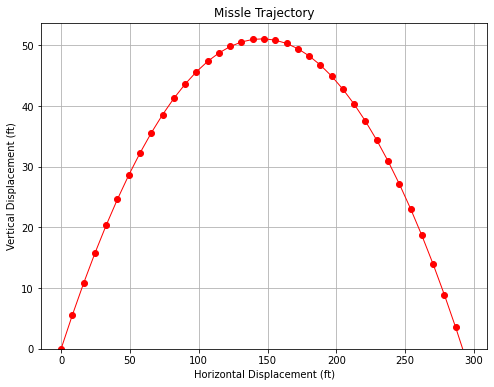

In [27]:
def x(vx,t): # horizontal displacement function
    x = vx*t
    return(x)

def y(g,vy,t): # vertical displacement function
    y = vy*t - (g*t**2)/2
    return(y)

# input data
gravity = 32.2 # ft/sec^2
vinit = 100 # ft/sec
angledeg = 35 # degrees of arc
import math # get math functions
anglerad = math.pi*(angledeg/180)
#####################################
# intermediate values
vx = vinit*math.cos(anglerad)
vy = vinit*math.sin(anglerad)
# calculate every timestep seconds
timestep = 0.1 # seconds
elapsedtime = [] # empty lists for output
disth = []
disty = []
howmany = 40
elapsedtime.append(0)
disth.append(0)
disty.append(0)
for irow in range(1,howmany,1):
    elapsedtime.append(elapsedtime[irow-1]+timestep)
    disth.append(x(vx,elapsedtime[irow]))
    disty.append(y(gravity,vy,elapsedtime[irow]))
    if disty[irow] < 0:
        break # exit the loop when missle falls back to Earth
####################################
# Now make a graph
from matplotlib import pyplot as plt  
mydata = plt.figure(figsize = (8,6)) # build a square drawing canvass from figure class
plt.plot(disth, disty, c='red', marker='o',linewidth=1) # basic line plot
plt.xlabel('Horizontal Displacement (ft)')
plt.ylabel('Vertical Displacement (ft)')
plt.ylim(0)
plt.title('Missle Trajectory')
plt.grid()
plt.show(); 
#####################################
